In [1]:
# おなじみ
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 統計処理
import scipy.stats as st
# matlabの日本語表示
import japanize_matplotlib
%matplotlib inline

import japanize_matplotlib\
はmatplotlibのグラフで日本語表示されるようにするpackage\
pip install japanize_matplotlib\
でインストールできる\
参考は\
https://ai-inter1.com/matplotlib-japanize/#st-toc-h-2

# 第1章
## 多変量解析の基礎を学びたい
## --- Rによる多変量データの基本的な統計量

### 1.1 データの手法と概要 

#### 1.1.1 データの概要
#### 1.1.2 データの読み込み

pandasのデータフレームに読み込み\
このCSVファイルには、行と列の名前が指定されているので、\
index_col = 0 (0列目を行名にする)\
header = True (0行目を列名にする)\
header = True はdefaultのため、書いてない

In [2]:
df_jhk = pd.read_csv('人事評価結果.csv', index_col = 0,encoding = 'shift-jis')

大きさとカラム名の確認\
この値は本であると、IDの分まで含んでいるため、(800,11)となっている

In [3]:
df_jhk.shape

(800, 10)

In [4]:
df_jhk.columns

Index(['性別', '部署', '年代', '協調性', '自己主張', '技能', '知識', 'ストレス', '総合', '昨年総合'], dtype='object')

少しデータの確認

In [5]:
df_jhk.head(5)

,性別,部署,年代,協調性,自己主張,技能,知識,ストレス,総合,昨年総合
ID,,,,,,,,,,
1,M,A部,中堅,70,45,65,71,53,251,248
2,F,B部,熟練,45,62,51,72,64,227,211
3,M,A部,中堅,54,70,55,70,61,249,242
4,M,A部,熟練,51,63,53,65,60,232,240
5,F,A部,若手,56,52,44,68,56,217,177


#### 1.1.3 手法の概要
### 1.2 単変量データの基礎分析
### 1.2.1 ヒストグラムの描画

matlabを使うとこんな感じ

(array([  3.,   1.,   6.,  19.,  22.,  26.,  32.,  53., 109.,  94., 113.,
        102.,  73.,  33.,  43.,  39.,  21.,   6.,   2.,   3.]),
 array([36.  , 37.85, 39.7 , 41.55, 43.4 , 45.25, 47.1 , 48.95, 50.8 ,
        52.65, 54.5 , 56.35, 58.2 , 60.05, 61.9 , 63.75, 65.6 , 67.45,
        69.3 , 71.15, 73.  ]),
 <a list of 20 Patch objects>)

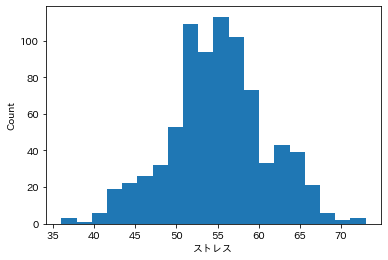

In [6]:
plt.xlabel('ストレス')
plt.ylabel('Count')
plt.hist(df_jhk["ストレス"], bins = 20)

pandasのデータフレームで直接描くと

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196A30CA988>,
      dtype=object)

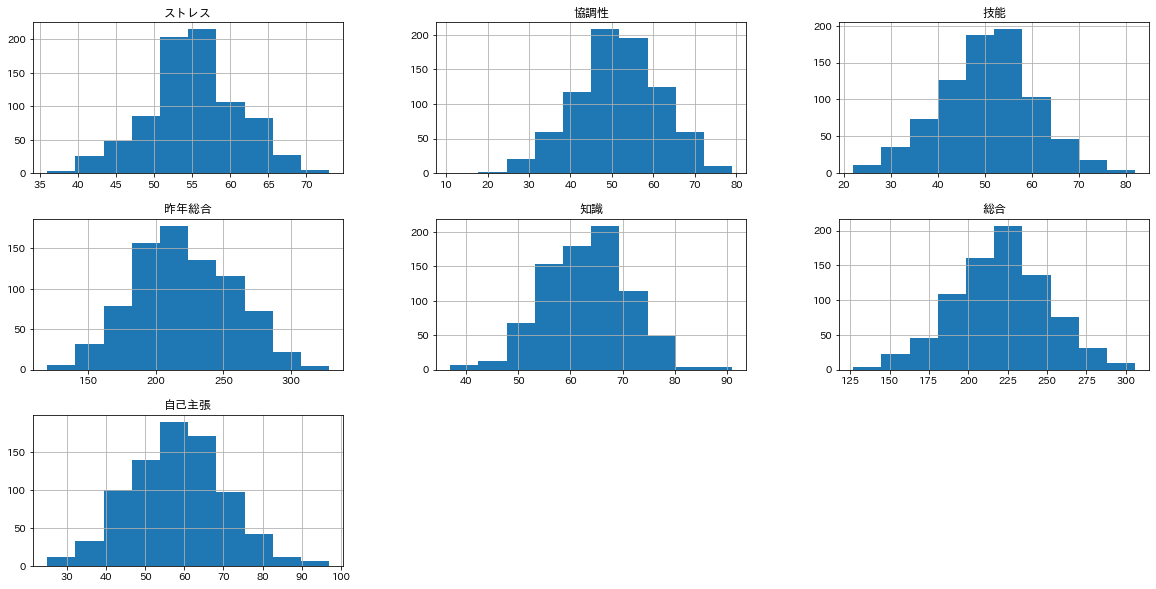

In [7]:
df_jhk.hist(figsize = (20,10))

seabornのpairplotで描く\
ヒストグラムだけでなく、散布図も同時に描く
すこし時間かかる

In [8]:
import seaborn as sns

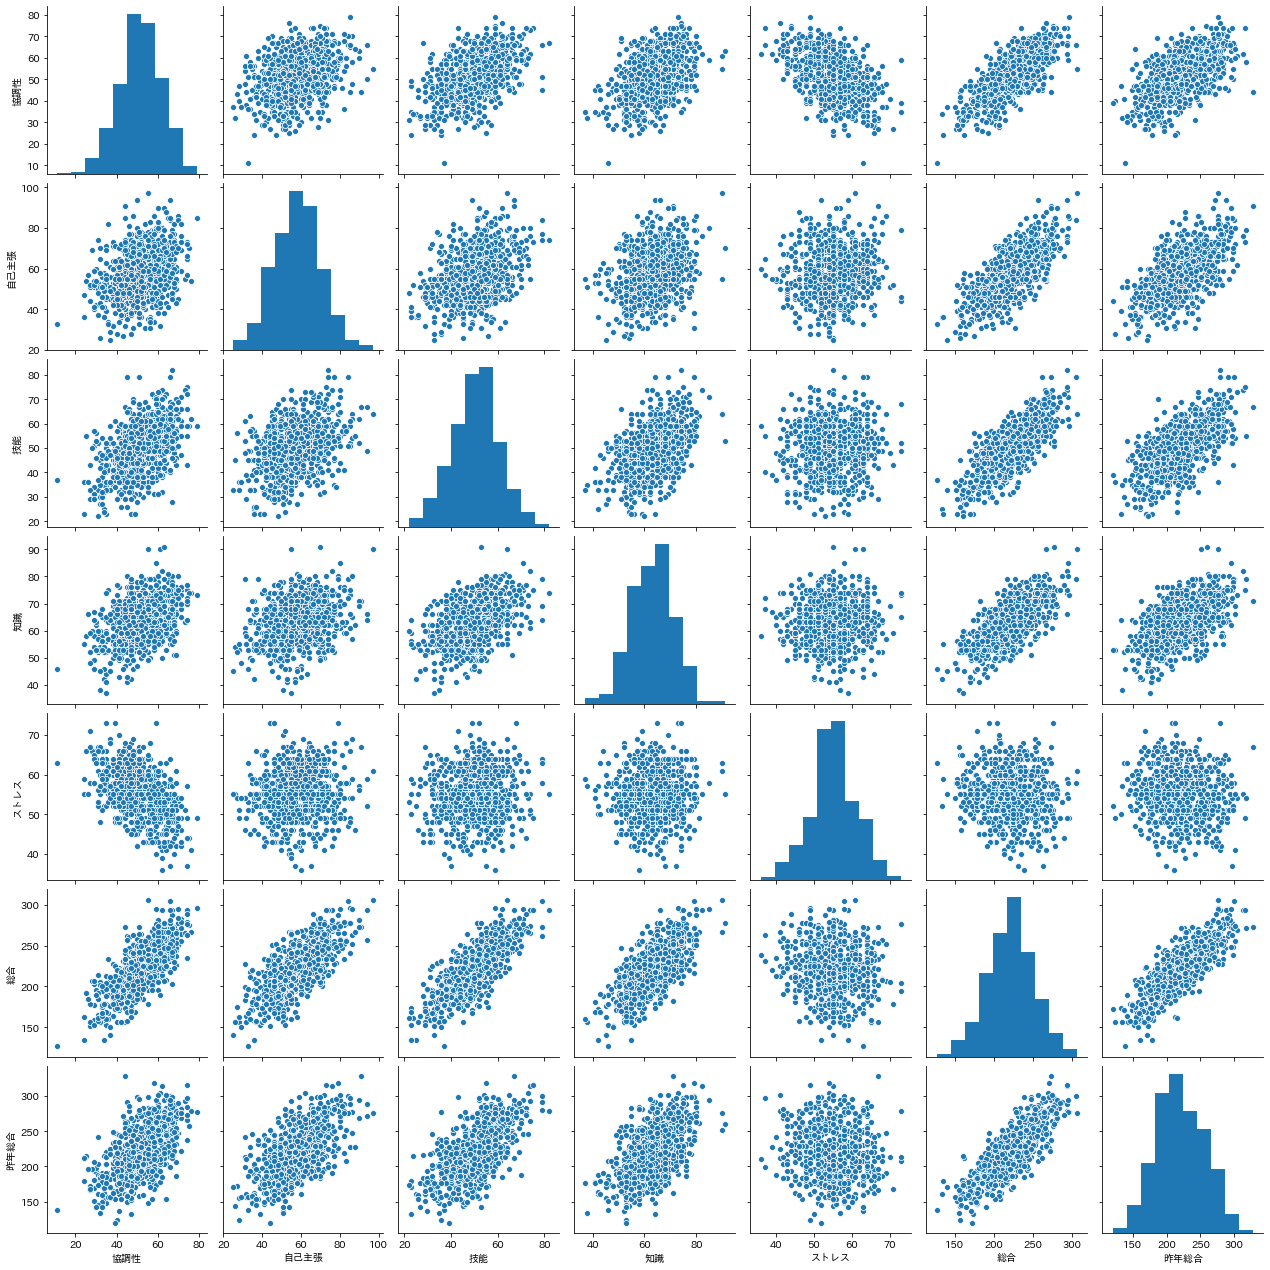

In [9]:
sns.pairplot(df_jhk)

#### 1.2.2 代表値と散布図

##### 代表値
数値の物はこれで出る。

In [10]:
df_jhk.describe(include = 'all')

,性別,部署,年代,協調性,自己主張,技能,知識,ストレス,総合,昨年総合
count,800,800,800,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000
unique,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,A部,若手,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,483,424,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,51.191250,58.005000,50.006250,63.003750,55.05250,221.017500,220.398750
std,NaN,NaN,NaN,10.101471,11.992905,10.006567,7.995539,6.02288,29.699912,35.949377
min,NaN,NaN,NaN,11.000000,25.000000,22.000000,37.000000,36.00000,127.000000,120.000000
25%,NaN,NaN,NaN,44.000000,50.000000,44.000000,57.750000,51.00000,201.000000,195.000000
50%,NaN,NaN,NaN,51.000000,57.000000,50.000000,63.000000,55.00000,222.000000,218.000000
75%,NaN,NaN,NaN,58.000000,66.000000,56.000000,69.000000,59.00000,241.000000,247.000000


ちなみにStdは不偏標準分散

In [11]:
df_jhk['年代'].value_counts()

若手    315
中堅    308
熟練    177
Name: 年代, dtype: int64

### 1.3 単変量データの群間比較

残念ながら、RのようにPythonで1発でやる方法は分からなかった。\
なので、書いてみた。

In [12]:
from matplotlib import ticker

pythonには標準で、Rのようなものはないので関数を作成\
そんなに大変ではない。

In [13]:
def histby2hue( df, target ,hue1, hue2 ):
    hue1_d = df[hue1].unique()
    hue2_d = df[hue2].unique()
    fig,axes = plt.subplots(nrows=len(hue1_d),ncols = len(hue2_d),figsize=(20,10))#, sharey = True, sharex = True)
    max_x, min_x = max(df[target]), min(df[target]) 

    for i, h1 in enumerate(hue1_d):
        for j, h2 in enumerate(hue2_d):
            data = df[target].where((df[hue1] == h1) & (df[hue2] == h2)).dropna().values
            axes[i,j].hist(data, bins = 15, range = ((min_x//10)*10, (max_x//10+1)*10 + 5), density = True)
        
            axes[i,j].set_title('{}  |  {}'.format( h1, h2 ))
            

若干の違いがあるものの、大体あってる気がする。\
気が向いたら、Rの仕様を確認する。

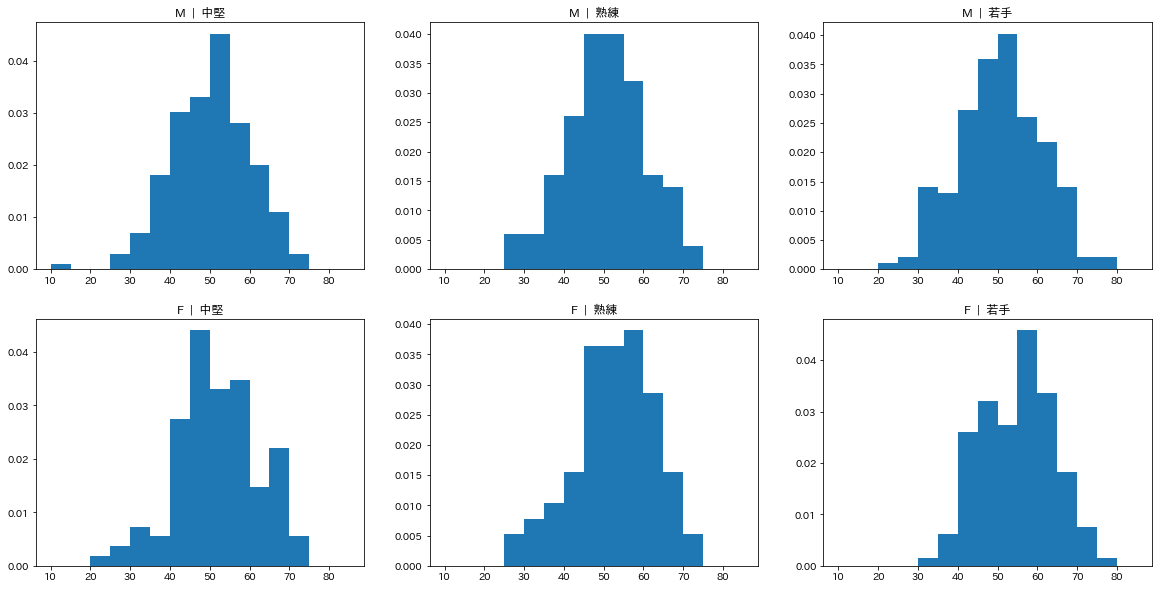

In [14]:
histby2hue(df_jhk, '協調性', '性別', '年代')

#### 1.3.2 代表値と散布度

平均

In [15]:
pd.pivot_table(df_jhk,  columns='性別')

性別,F,M
ストレス,55.239748,54.929607
協調性,52.921136,50.055901
技能,50.378549,49.761905
昨年総合,221.126183,219.921325
知識,63.056782,62.968944
総合,220.772871,221.178054
自己主張,57.416404,58.391304


不偏標準分散

In [16]:
pd.pivot_table(df_jhk,  columns='性別', aggfunc = np.std)

性別,F,M
ストレス,6.315988,5.825898
協調性,9.845809,10.116078
技能,10.153034,9.912231
昨年総合,35.786151,36.085164
知識,7.662786,8.214264
総合,29.557905,29.822250
自己主張,11.233291,12.462645


{'whiskers': [<matplotlib.lines.Line2D at 0x196a74fb548>,
 'caps': [<matplotlib.lines.Line2D at 0x196a74fbe08>,
 'boxes': [<matplotlib.lines.Line2D at 0x196a74f79c8>],
 'medians': [<matplotlib.lines.Line2D at 0x196a74ffd88>],
 'fliers': [<matplotlib.lines.Line2D at 0x196a7503c08>],
 'means': []}

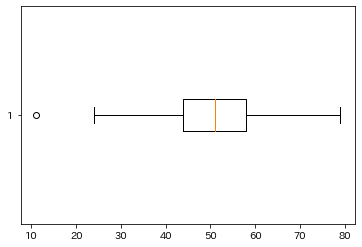

In [17]:
plt.boxplot(df_jhk['協調性'],vert=False)

本とは上下逆

{'whiskers': [<matplotlib.lines.Line2D at 0x196a70a6488>,
 'caps': [<matplotlib.lines.Line2D at 0x196a70ddb08>,
 'boxes': [<matplotlib.lines.Line2D at 0x196a70d2fc8>,
 'medians': [<matplotlib.lines.Line2D at 0x196a70e2a08>,
 'fliers': [<matplotlib.lines.Line2D at 0x196a70e2b08>,
 'means': []}

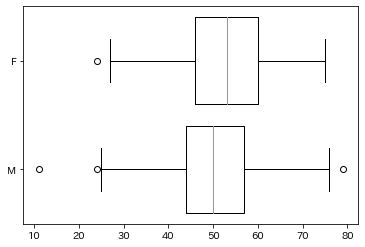

In [18]:
data = [df_jhk['協調性'].where(df_jhk['性別'] == 'M').dropna().values,\
       df_jhk['協調性'].where(df_jhk['性別'] == 'F').dropna().values]
plt.boxplot(data,vert=False, widths = 0.8, labels = ['M', 'F'])

要約統計量については、上でdf.describe()で出ている。

#### 1.3.4 t検定

まずは、等分散を仮定したt検定をおこなうか、等分散が異なるときのt検定Welchの検定を行う確かめる。\
帰無仮説 : *等分散*

In [19]:
len(df_jhk['協調性'].where(df_jhk['性別'] == 'M').dropna())

483

In [20]:
#検定統計量
df_m = df_jhk['協調性'].where(df_jhk['性別'] == 'M').dropna()
df_f = df_jhk['協調性'].where(df_jhk['性別'] == 'F').dropna()
F = np.var(df_f, ddof=1) / np.var(df_m, ddof=1)
print('F      :',F)
df1 = len(df_f)-1
df2 = len(df_m)-1

alpha = 0.05 #有意水準
pval = st.f.cdf(F, df1, df2)
print('p-value:',pval*2)# 両側にして検定（簡単に2倍にしていいか怪しい）

F      : 0.9472802327082039
p-value: 0.6026227708873964


p値>0.05より帰無仮説は棄却されないので、等分散で行う。\
帰無仮説:*平均が等しい*

In [21]:
st.ttest_ind(df_f, df_m )

Ttest_indResult(statistic=3.959930184798102, pvalue=8.166909332546908e-05)

pvalue<0.05以下より帰無仮説は棄却され平均は等しいとは言えない。

ちなみに最近は等分散性を確かめずに、いきなりWelchの検定を行うことが推奨されているらしい。\
調べるとたくさん出てくる。\
以下Welchの検定

In [22]:
st.ttest_ind(df_f, df_m, equal_var = False)

Ttest_indResult(statistic=3.9822668357027786, pvalue=7.551899451158485e-05)

Welchの検定でも、棄却されたことがわかる。

対応のあるt検定

In [23]:
st.ttest_rel(df_jhk['総合'], df_jhk['昨年総合'])

Ttest_relResult(statistic=0.8511848435948919, pvalue=0.3949217026484646)

今回の場合棄却されない。

#### 1.3.5 母平均信頼区間の描画

pythonには。plotmeansみたいのはないので、作る。

In [24]:
def unbvar(a):
    return np.var(a, ddof = 1)

In [25]:
import itertools

In [29]:
def databycat(df, target, hue):
    
    if isinstance(hue, str):
        datas = []
        cats = df[hue].unique()
        for c in cats:
            datas.append(df[target].where(df[hue] == c).dropna().values)
        return datas, cats
    else:   
        
        cats = [ df[h].unique() for h in hue ]
        datas = []

        combcat = itertools.product(*cats)
        for i, p in enumerate(combcat):
            df_tmp = df
            for h, pp in zip(hue, p):
                
                df_tmp = df_tmp.where(df[h] == pp)
            datas.append(df_tmp[target].dropna().values)

        return datas, cats, combcat

In [30]:
def plotmeans(df, target, hue, ylim, pvalue = 0.95):
    
    data, cats  = databycat(df, target, hue)

    l = len(data)
    # 不偏分散
    
    u2 = df.pivot_table(index = hue, values = target, aggfunc = unbvar)
    # 標本平均
    m = df.pivot_table(index = hue, values = target, aggfunc = np.mean)
    #自由度
    DF = np.array([ len(v) - 1 for v in data])
    
    # 標準誤差
    se =  df.pivot_table(index = hue, values = target, aggfunc = st.sem)
    
    # 母平均の信頼区間の推定
    intervals = []
    for mm, ss, dd in zip(m.values, se.values, DF):

        intervals.append(st.t.interval( alpha=pvalue, loc=mm[0], scale=ss[0], df=dd ))
    
    
    print(target + 'の ' + str(pvalue*100) + '% 信頼区間')
    for i, (inter, cat) in enumerate(zip(intervals, cats)):
    
        print( cat + '   ' , end = '')
        print(inter)
        
    y_err = [ (i[1] - i[0])/2  for i in intervals]
    plt.title('')
    
    plt.xlabel(hue)
    plt.ylabel(target)
    plt.plot(np.arange(0, l).tolist(), m.values, c = 'black')
    
    catnum = np.arange(0, l)
    plt.xticks(catnum, cats)
    plt.ylim(np.array(ylim) + np.array([-0.5, 0.5]))
    plt.errorbar(x = catnum, y = m.values, yerr = y_err, capsize=5, fmt='o', markersize=10, ecolor='black', markeredgecolor = "black", color='w')

協調性の 95.0% 信頼区間
M   (51.834555467587776, 54.00771582578761)
F   (49.1502654978, 50.96153574443603)


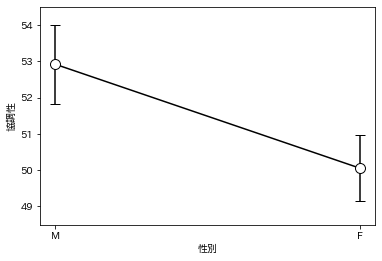

In [32]:
plotmeans(df_jhk, '協調性', '性別', ylim = [49,54])

### 1.4 多変量データの基礎分析
#### 1.4.1 多変量データの集計

平均
複数業連続したものの時はこれが楽


df_jhk['協調性': '知識'] #type error\
df_jhk[['協調性', '自己主張', '技能', '知識']] #=>下と同じ結果

In [33]:
df_jhk2 = df_jhk.loc[:, '協調性': '知識']

平均の場合上のdescribeにもあるが

In [34]:
df_jhk2.mean()

協調性     51.19125
自己主張    58.00500
技能      50.00625
知識      63.00375
dtype: float64

In [35]:
df_jhk2.std()

協調性     10.101471
自己主張    11.992905
技能      10.006567
知識       7.995539
dtype: float64

社員ごと行ごとの時は、axis = 1を設定

In [36]:
df_jhk2.sum(axis = 1)

ID
1      251
2      230
3      249
4      232
5      220
      ... 
796    179
797    164
798    167
799    244
800    188
Length: 800, dtype: int64

In [37]:
df_jhk2.std(axis = 1)

ID
1      12.120919
2      11.958261
3       8.958236
4       7.023769
5      10.000000
         ...    
796     8.995369
797    12.961481
798    11.441882
799     9.763879
800    12.274635
Length: 800, dtype: float64

なんだか勝手に順番が変わっている

In [38]:
df_jhk.pivot_table(index = "性別", values = ['協調性', '自己主張','技能', '知識'], aggfunc = np.mean)

,協調性,技能,知識,自己主張
性別,,,,
F,52.921136,50.378549,63.056782,57.416404
M,50.055901,49.761905,62.968944,58.391304


In [39]:
df_jhk.pivot_table(index = "性別", values = ['協調性', '自己主張','技能', '知識'], aggfunc = np.std)

,協調性,技能,知識,自己主張
性別,,,,
F,9.845809,10.153034,7.662786,11.233291
M,10.116078,9.912231,8.214264,12.462645


In [40]:
zscore = st.zscore(df_jhk2)

In [41]:
zscore[:5]

array([[ 1.86314606, -1.08506956,  1.49932844,  1.00071454],
       [-0.61328919,  0.33332202,  0.09937191,  1.12586253],
       [ 0.2782275 ,  1.00080041,  0.49935949,  0.87556656],
       [-0.01894473,  0.41675682,  0.2993657 ,  0.24982666],
       [ 0.47634232, -0.50102597, -0.60060635,  0.6252706 ]])

データフレームのままのほうがいい場合

In [42]:
df_jhk2.apply(st.zscore)[:5]

,協調性,自己主張,技能,知識
ID,,,,
1,1.863146,-1.085070,1.499328,1.000715
2,-0.613289,0.333322,0.099372,1.125863
3,0.278228,1.000800,0.499359,0.875567
4,-0.018945,0.416757,0.299366,0.249827
5,0.476342,-0.501026,-0.600606,0.625271


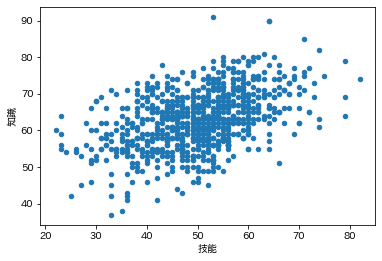

In [43]:
df_jhk2.plot.scatter('技能', '知識')

本と違って、ヒストグラムも出てしまうが、近いのは既出であるがseabornのpairplotかな、

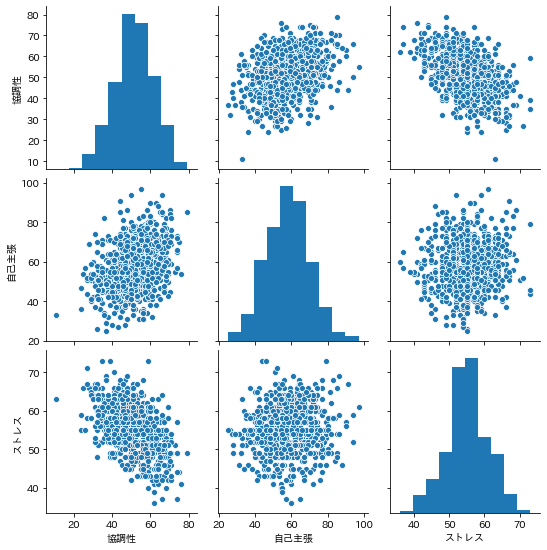

In [44]:
df_jhk3 = df_jhk[['協調性','自己主張','ストレス']]
sns.pairplot(df_jhk3)

In [45]:
def xyplot(df, x, y, hue1, hue2 ):
    X_data, cats, combcat  = databycat(df = df, target = x, hue = [hue1, hue2])
    Y_data, _, _     = databycat(df = df, target = y, hue = [hue1, hue2])

    fig, axes= plt.subplots(nrows=len(cats[0]),ncols = len(cats[1]),figsize=(20,10), sharey = True, sharex = True)
    fig.suptitle('{}と{}の層別の{}と{}の散布図'.format(hue1,hue2,x,y), fontsize=30)
    #xラベル用
    fig.text(0.5, 0.02, x, ha='center', va='center', fontsize =30)
    #yラベル用
    fig.text(0.02, 0.5,y, ha='center', va='center', rotation='vertical', fontsize = 30)
    for i, (X, Y) in enumerate(zip(X_data, Y_data)):
            
            v = i // len(cats[1])
            h = i % len(cats[1])
            title = '{} | {}'.format(cats[0][v], cats[1][h])
            axes[v, h].set_title(title, fontsize =20)
            axes[v, h].scatter(X,Y)
        
    

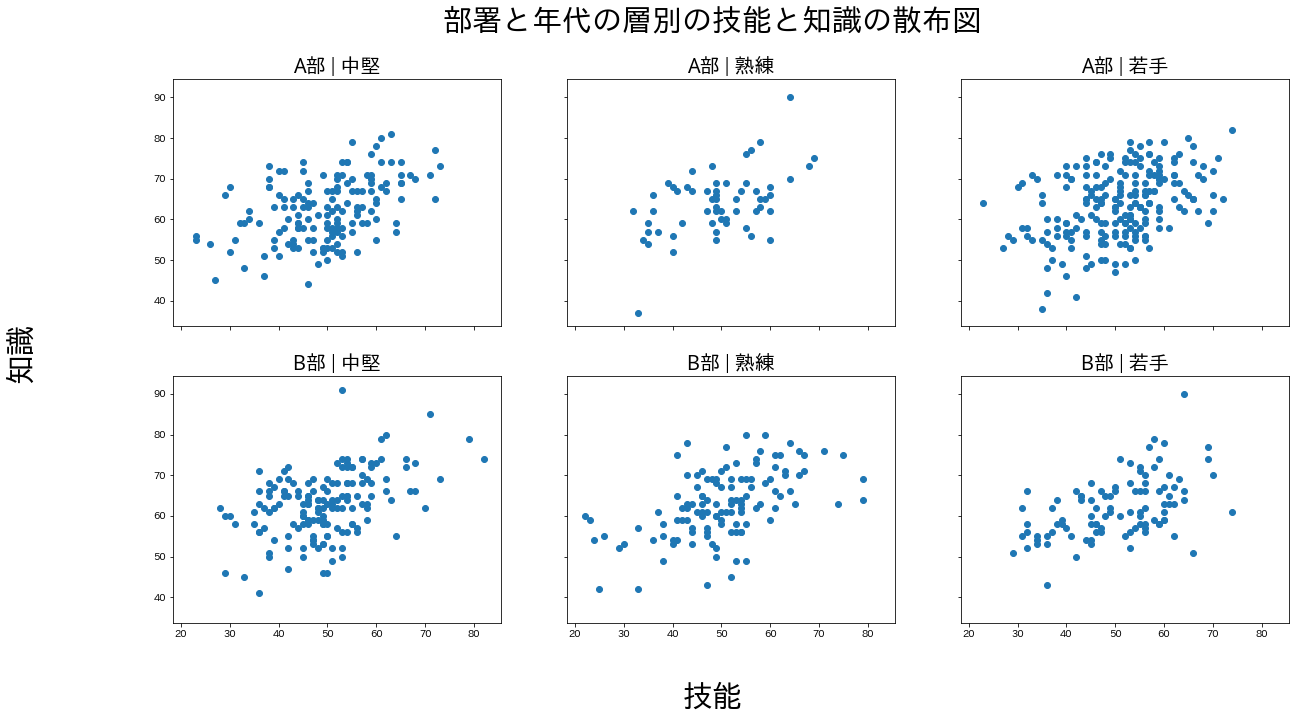

In [46]:
xyplot(df_jhk, x = "技能", y = "知識", hue1 = "部署", hue2 = "年代" )

##### 相関係数

In [47]:
df_jhk.corr()

,協調性,自己主張,技能,知識,ストレス,総合,昨年総合
協調性,1.000000,0.348603,0.491558,0.422801,-0.507292,0.753461,0.606341
自己主張,0.348603,1.000000,0.380033,0.302365,0.114719,0.733777,0.618356
技能,0.491558,0.380033,1.000000,0.452411,0.098075,0.777872,0.650259
知識,0.422801,0.302365,0.452411,1.000000,0.019020,0.687271,0.542788
ストレス,-0.507292,0.114719,0.098075,0.019020,1.000000,-0.089297,-0.091982
総合,0.753461,0.733777,0.777872,0.687271,-0.089297,1.000000,0.820321
昨年総合,0.606341,0.618356,0.650259,0.542788,-0.091982,0.820321,1.000000


In [48]:
# 共分散(分散)
df_jhk.cov()

,協調性,自己主張,技能,知識,ストレス,総合,昨年総合
協調性,102.039723,42.231834,49.687164,34.148218,-30.863620,226.047963,220.187724
自己主張,42.231834,143.829762,45.606977,28.993723,8.286345,261.362866,266.596252
技能,49.687164,45.606977,100.131375,36.196472,5.910810,231.178864,233.917405
知識,34.148218,28.993723,36.196472,63.928647,0.915948,163.203939,156.016025
ストレス,-30.863620,8.286345,5.910810,0.915948,36.275088,-15.973385,-19.915829
総合,226.047963,261.362866,231.178864,163.203939,-15.973385,882.084800,875.851586
昨年総合,220.187724,266.596252,233.917405,156.016025,-19.915829,875.851586,1292.357696


本にはないが、相関係数の可視化するときに使えるのはseabornのheatmap

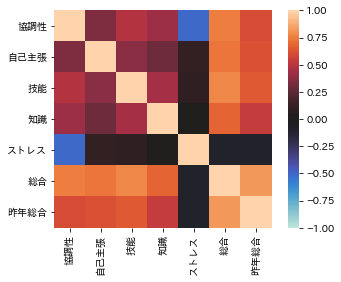

In [49]:
sns.heatmap(df_jhk.corr(), square=True, vmax=1, vmin=-1, center=0)

相関係数の検定はpythonにはないので書く

In [50]:
def corrtest(df):
    
    corr = df.corr()
    
    #統計量の作成
    n = np.array([798,798])
    t = corr * np.sqrt((n)/ (1-corr**2))
    print(t)
    print(st.t.pdf(x = t, df = 799))
    t_dist = stats.t(loc=0,
                 scale=np.sqrt(waku_sample.var()/10),
                 df=9)
    bottom, up = t_dist.interval(alpha=0.95)

In [51]:
corrtest(df_jhk[['協調性', 'ストレス']])

            協調性       ストレス
協調性         inf -16.628992
ストレス -16.628992        inf
[[0.00000000e+00 9.36576739e-53]
 [9.36576739e-53 0.00000000e+00]]


NameError: name 'stats' is not defined

### 参考文献
[matplotlib]グラフを描く\
https://openbook4.me/sections/1396 \
Pandas DataFrameから条件指定でのデータ抽出(複数条件、範囲指定、日時・日付・年月日での抽出など)\
https://ai-inter1.com/pandas-dataframe_condition/ \
Rによるやさしい統計学 \ 
